<a href="https://colab.research.google.com/github/nikeshgamal24/Car-Price-Prediction-Project/blob/main/Car_Price_Prediction_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings
%matplotlib inline

https://www.kaggle.com/datasets/bhavikjikadara/car-price-prediction-dataset/data

In [11]:
data = pd.read_csv("car_prediction_data.csv")

In [12]:
data.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
22,sx4,2011,4.40,8.01,50000,Petrol,Dealer,Automatic,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0
246,i20,2012,3.75,6.79,35000,Petrol,Dealer,Manual,0
33,ertiga,2014,6.00,9.95,45000,Diesel,Dealer,Manual,0
222,i20,2014,6.00,7.60,77632,Diesel,Dealer,Manual,0


In [13]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
for col in data.columns:
  print(f"Column Name: {col},   Data Type: {data[col].dtype}")
  print(f"Unique Value Count: {len(data[col].unique())}")
  print("--"*20)

Column Name: Car_Name,   Data Type: object
Unique Value Count: 98
----------------------------------------
Column Name: Year,   Data Type: int64
Unique Value Count: 16
----------------------------------------
Column Name: Selling_Price,   Data Type: float64
Unique Value Count: 156
----------------------------------------
Column Name: Present_Price,   Data Type: float64
Unique Value Count: 147
----------------------------------------
Column Name: Kms_Driven,   Data Type: int64
Unique Value Count: 206
----------------------------------------
Column Name: Fuel_Type,   Data Type: object
Unique Value Count: 3
----------------------------------------
Column Name: Seller_Type,   Data Type: object
Unique Value Count: 2
----------------------------------------
Column Name: Transmission,   Data Type: object
Unique Value Count: 2
----------------------------------------
Column Name: Owner,   Data Type: int64
Unique Value Count: 3
----------------------------------------


In [16]:
print(f"Unique Values of Fuel_Type: {data['Fuel_Type'].unique()}")
print(f"Unique Values of Seller_Type: {data['Seller_Type'].unique()}")
print(f"Unique Values of Transmission: {data['Transmission'].unique()}")
print(f"Unique Values of Owner: {data['Owner'].unique()}")

Unique Values of Fuel_Type: ['Petrol' 'Diesel' 'CNG']
Unique Values of Seller_Type: ['Dealer' 'Individual']
Unique Values of Transmission: ['Manual' 'Automatic']
Unique Values of Owner: [0 1 3]


In [17]:
## 1. Missing values
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [18]:
## 2. duplicated records
data[data.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [19]:
## Remove duplicate values from the dataset

In [20]:
data.drop_duplicates(keep="first",inplace=True)

In [21]:
data[data.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


In [22]:
## 3. DIstribution of the numerical features
numerical_features = [feature for feature in data.columns if data[feature].dtype!='O']
numerical_features

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

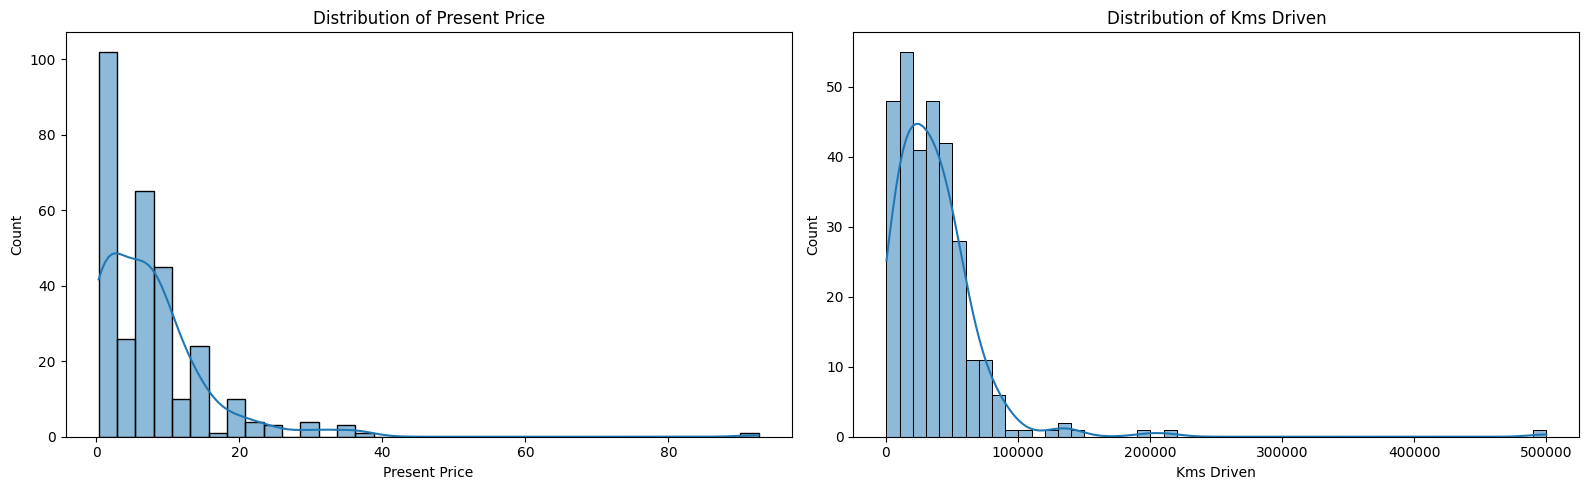

In [23]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(data["Present_Price"], kde=True)
plt.title("Distribution of Present Price") # Add a title for clarity
plt.xlabel("Present Price") # Add x-axis label

plt.subplot(1, 2, 2)
sns.histplot(data["Kms_Driven"], kde=True)
plt.title("Distribution of Kms Driven") # Add a title for clarity
plt.xlabel("Kms Driven") # Add x-axis label

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

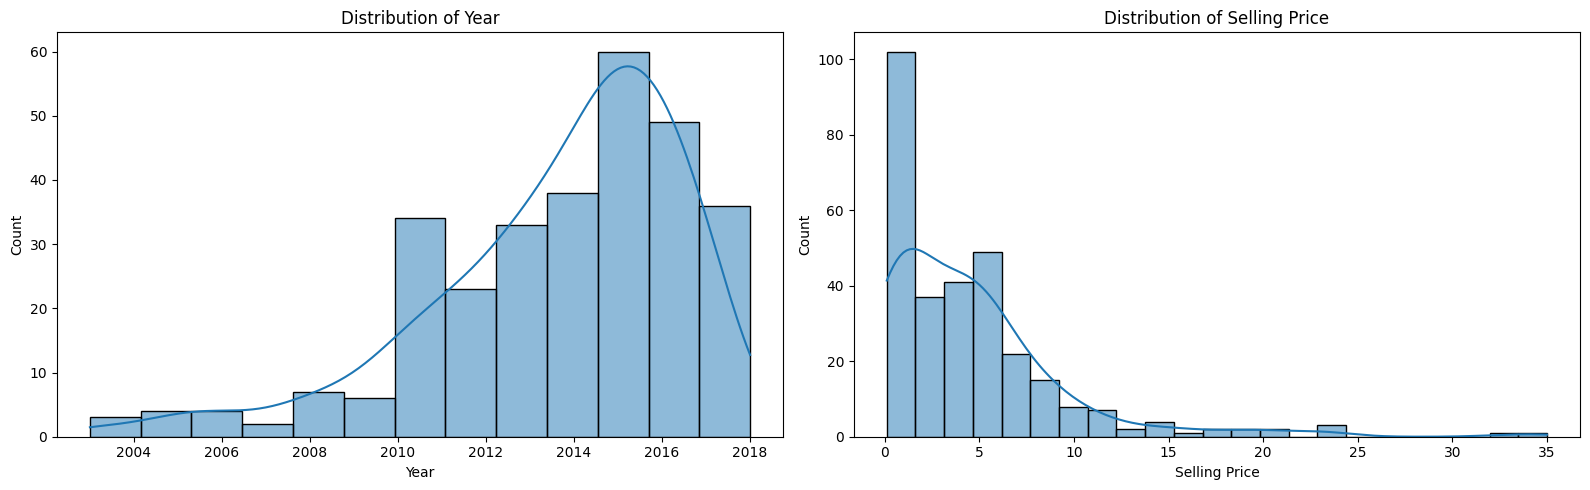

In [24]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(data["Year"], kde=True)
plt.title("Distribution of Year")
plt.xlabel("Year")

plt.subplot(1, 2, 2)
sns.histplot(data["Selling_Price"], kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.tight_layout()
plt.show()

In [25]:
data.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
105,KTM RC390,2015,1.35,2.37,21700,Petrol,Individual,Manual,0
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
94,corolla altis,2008,4.00,22.78,89000,Petrol,Dealer,Automatic,0
207,grand i10,2015,5.15,5.70,34797,Petrol,Dealer,Automatic,0
203,i10,2011,2.95,4.60,53460,Petrol,Dealer,Manual,0


In [26]:
# Findinf Outliers of Present Price, Selling Price and KMs Driven
data["Kms_Driven"].skew(), data["Present_Price"].skew(), data["Selling_Price"].skew()

(np.float64(6.418134387971488),
 np.float64(4.186894223914912),
 np.float64(2.536521826497541))

In [27]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [28]:
new_data_df = data.copy()

for feature in numerical_features:
  if feature != 'Year' and feature != 'Owner':
    q1 = new_data_df[feature].quantile(0.25)
    q3 = new_data_df[feature].quantile(0.75)

    iqr = q3 - q1

    ## upper_limit and lower_limit values calculation
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    print(f"Feature Name: {feature}")
    print(f"Q1: {q1}")
    print(f"Q3: {q3}")
    print(f"IQR: {iqr}")
    print(f"Upper Boundary Value: {upper_limit}")
    print(f"Lower Boundar Value: {lower_limit}")
    print('--'*20)


Feature Name: Selling_Price
Q1: 0.8500000000000001
Q3: 6.0
IQR: 5.15
Upper Boundary Value: 13.725000000000001
Lower Boundar Value: -6.875
----------------------------------------
Feature Name: Present_Price
Q1: 1.2
Q3: 9.84
IQR: 8.64
Upper Boundary Value: 22.8
Lower Boundar Value: -11.760000000000002
----------------------------------------
Feature Name: Kms_Driven
Q1: 15000.0
Q3: 48883.5
IQR: 33883.5
Upper Boundary Value: 99708.75
Lower Boundar Value: -35825.25
----------------------------------------


In [29]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [30]:
new_data_df_capped = data.copy()
for feature in numerical_features:
  if feature != 'Year' and feature != 'Owner':
    q1 = new_data_df_capped[feature].quantile(0.25)
    q3 = new_data_df_capped[feature].quantile(0.75)

    iqr = q3 - q1

    ## upper_limit and lower_limit values calculation
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    new_data_df_capped[feature] = np.where(
        new_data_df_capped[feature] > upper_limit,
        upper_limit,
        np.where(
            new_data_df_capped[feature] < lower_limit,
            lower_limit,
            new_data_df_capped[feature]
        )
    )


In [31]:
new_data_df_trim = data.copy()
for feature in numerical_features:
  if feature != 'Year' and feature != 'Owner':
    q1 = new_data_df_trim[feature].quantile(0.25)
    q3 = new_data_df_trim[feature].quantile(0.75)

    iqr = q3 - q1

    ## upper_limit and lower_limit values calculation
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    new_data_df_trim = new_data_df_trim[(new_data_df_trim[feature] < upper_limit) & \
                                     (new_data_df_trim[feature] > lower_limit)].copy()

In [32]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [33]:
new_data_df_capped.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.233378,7.004448,34387.096990,0.043478
std,2.896868,3.727106,6.092974,23819.913773,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,13.725000,22.800000,99708.750000,3.000000


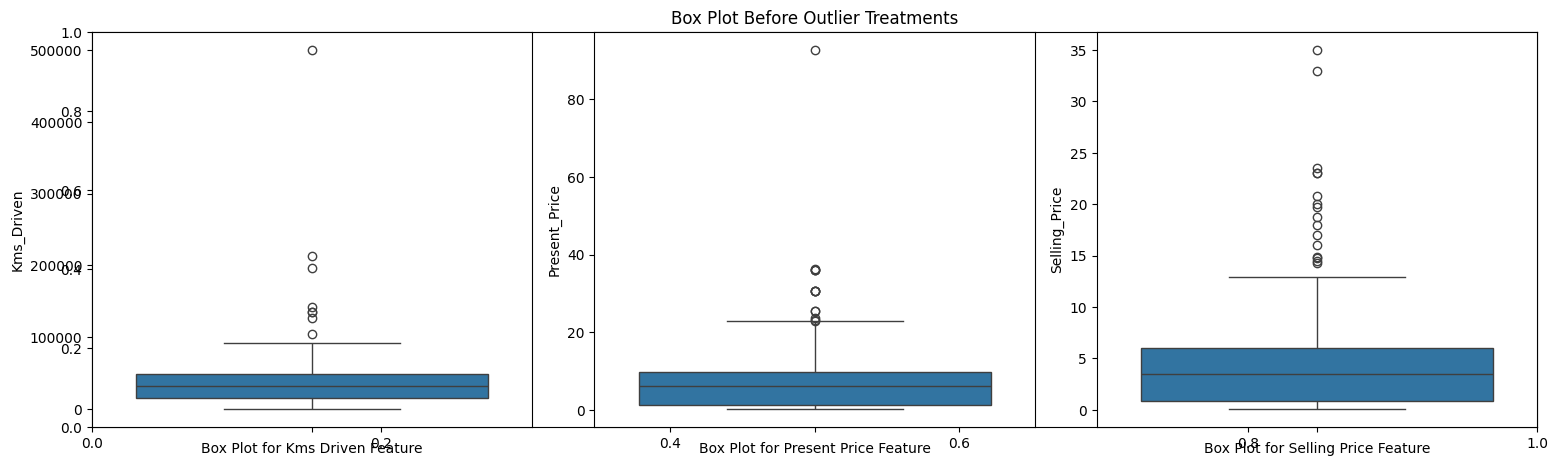

In [34]:
plt.figure(figsize=(16, 5))
plt.title("Box Plot Before Outlier Treatments")


plt.subplot(1, 3, 1)
sns.boxplot(data["Kms_Driven"])
plt.xlabel("Box Plot for Kms Driven Feature")

plt.subplot(1, 3, 2)
sns.boxplot(data["Present_Price"])
plt.xlabel("Box Plot for Present Price Feature")

plt.subplot(1, 3, 3)
sns.boxplot(data["Selling_Price"])
plt.xlabel("Box Plot for Selling Price Feature")

plt.tight_layout()
plt.show()

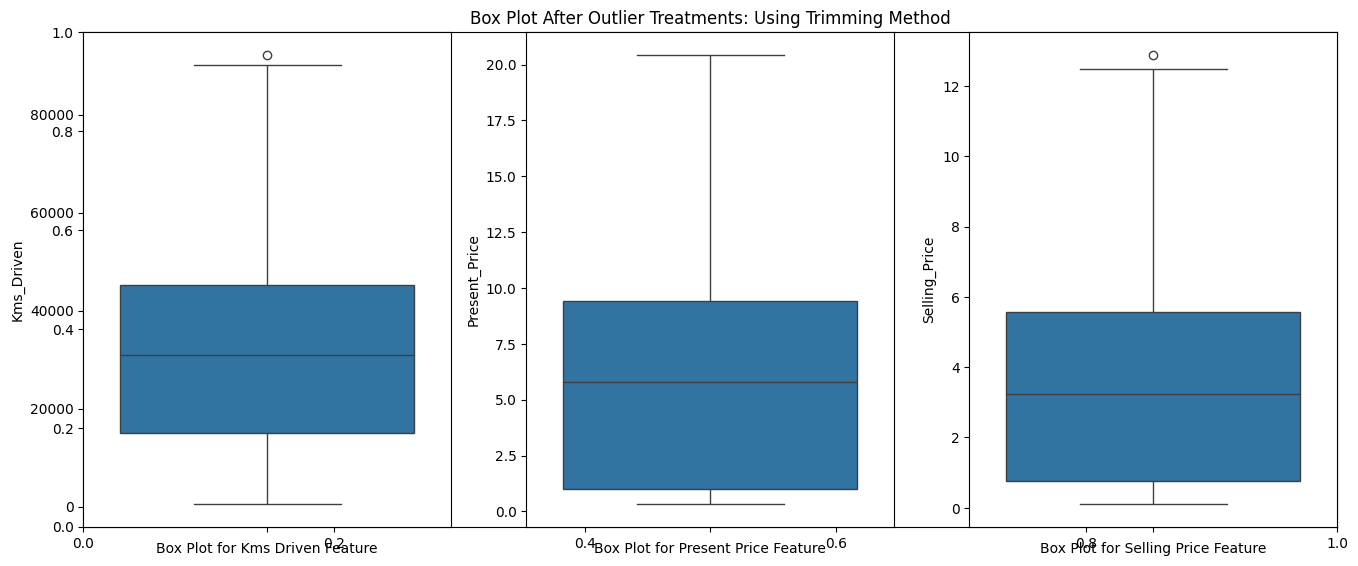

In [35]:
plt.figure(figsize=(14, 6))
plt.title("Box Plot After Outlier Treatments: Using Trimming Method")

plt.subplot(1, 3, 1)
sns.boxplot(new_data_df_trim["Kms_Driven"])
plt.xlabel("Box Plot for Kms Driven Feature")

plt.subplot(1, 3, 2)
sns.boxplot(new_data_df_trim["Present_Price"])
plt.xlabel("Box Plot for Present Price Feature")

plt.subplot(1, 3, 3)
sns.boxplot(new_data_df_trim["Selling_Price"])
plt.xlabel("Box Plot for Selling Price Feature")

plt.tight_layout()
plt.show()

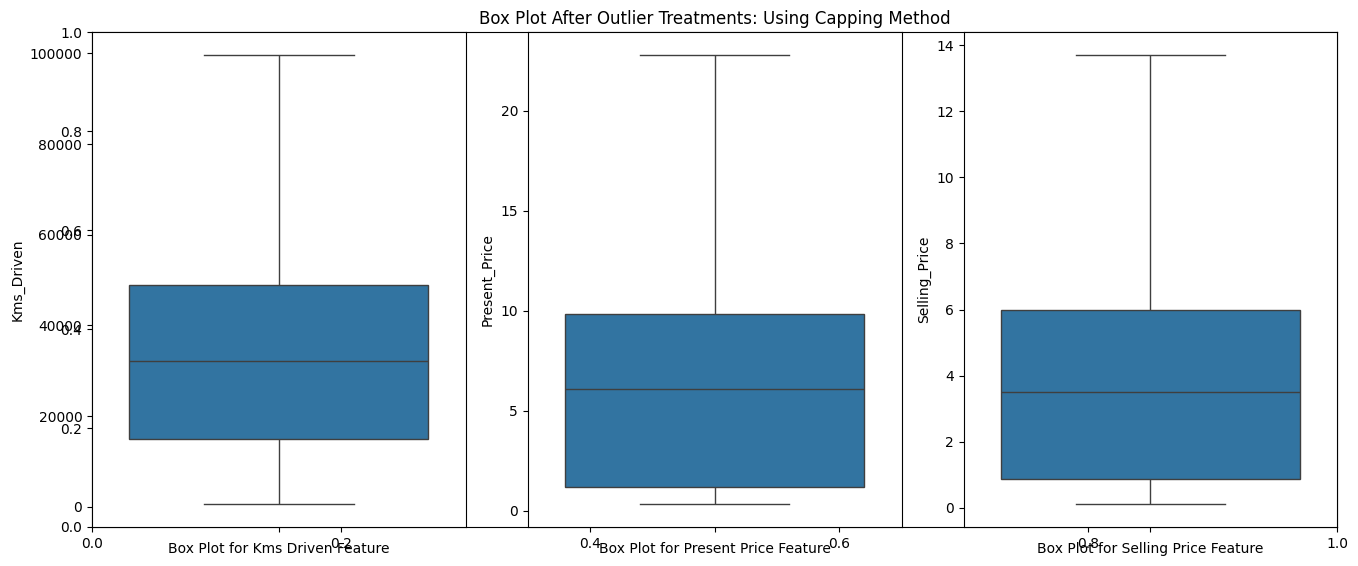

In [36]:
plt.figure(figsize=(14, 6))
plt.title("Box Plot After Outlier Treatments: Using Capping Method")

plt.subplot(1, 3, 1)
sns.boxplot(new_data_df_capped["Kms_Driven"])
plt.xlabel("Box Plot for Kms Driven Feature")

plt.subplot(1, 3, 2)
sns.boxplot(new_data_df_capped["Present_Price"])
plt.xlabel("Box Plot for Present Price Feature")

plt.subplot(1, 3, 3)
sns.boxplot(new_data_df_capped["Selling_Price"])
plt.xlabel("Box Plot for Selling Price Feature")

plt.tight_layout()
plt.show()

------------------------------------------------------------
Histograms Before Outliers Treatment
------------------------------------------------------------


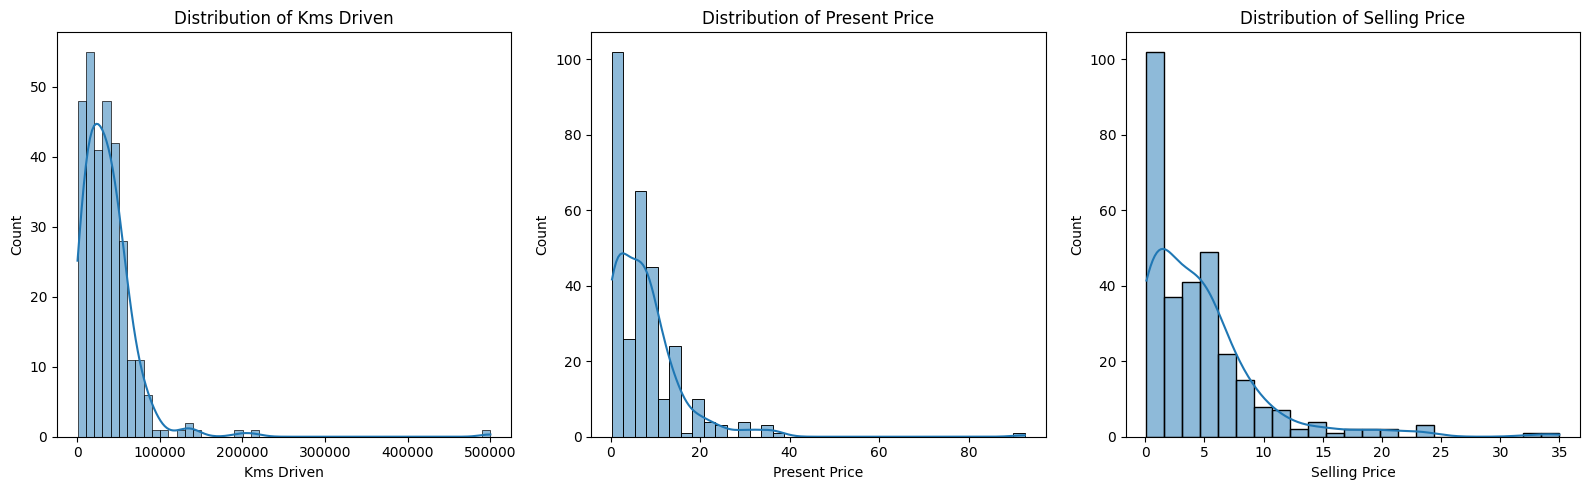

In [37]:
print("--"*30)
print("Histograms Before Outliers Treatment")
print("--"*30)

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(data["Kms_Driven"], kde=True)
plt.title("Distribution of Kms Driven")
plt.xlabel("Kms Driven")

plt.subplot(1, 3, 2)
sns.histplot(data["Present_Price"], kde=True)
plt.title("Distribution of Present Price")
plt.xlabel("Present Price")

plt.subplot(1, 3, 3)
sns.histplot(data["Selling_Price"], kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.tight_layout()
plt.show()

------------------------------------------------------------------------------------------------------------------------
Histograms After Outliers Treatment using Capping Method
------------------------------------------------------------------------------------------------------------------------


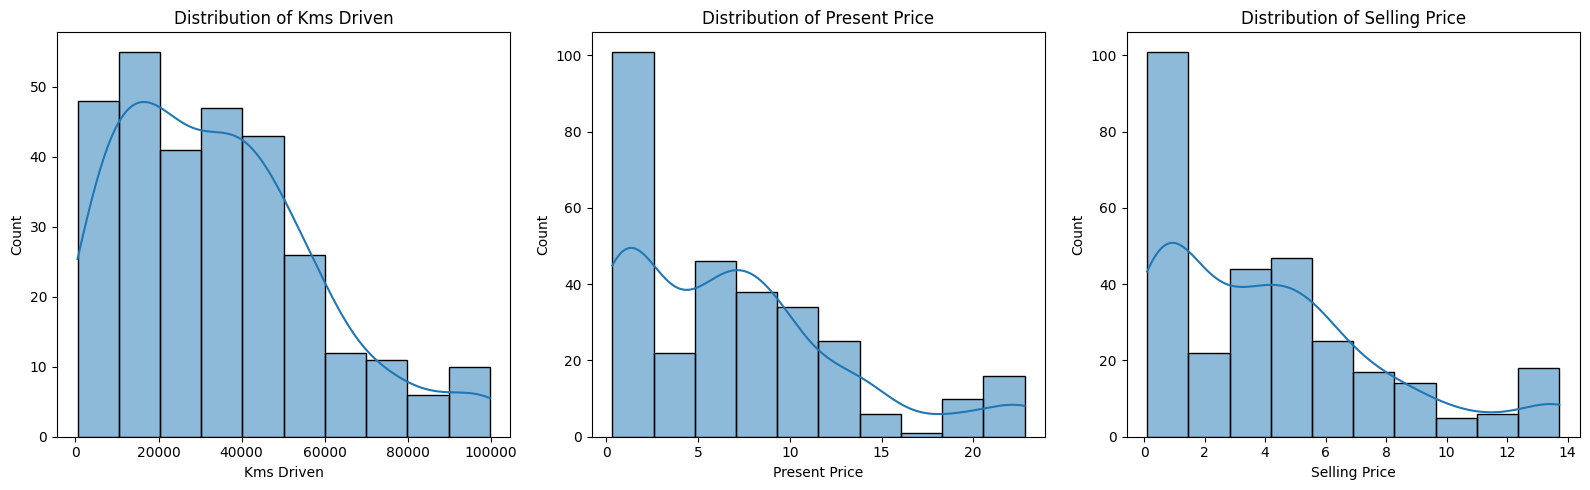

In [38]:
print("----"*30)
print("Histograms After Outliers Treatment using Capping Method")
print("----"*30)
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(new_data_df_capped["Kms_Driven"], kde=True)
plt.title("Distribution of Kms Driven")
plt.xlabel("Kms Driven")

plt.subplot(1, 3, 2)
sns.histplot(new_data_df_capped["Present_Price"], kde=True)
plt.title("Distribution of Present Price")
plt.xlabel("Present Price")

plt.subplot(1, 3, 3)
sns.histplot(new_data_df_capped["Selling_Price"], kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.tight_layout()
plt.show()

------------------------------------------------------------------------------------------------------------------------
Histograms After Outliers Treatment using Trimming Method
------------------------------------------------------------------------------------------------------------------------


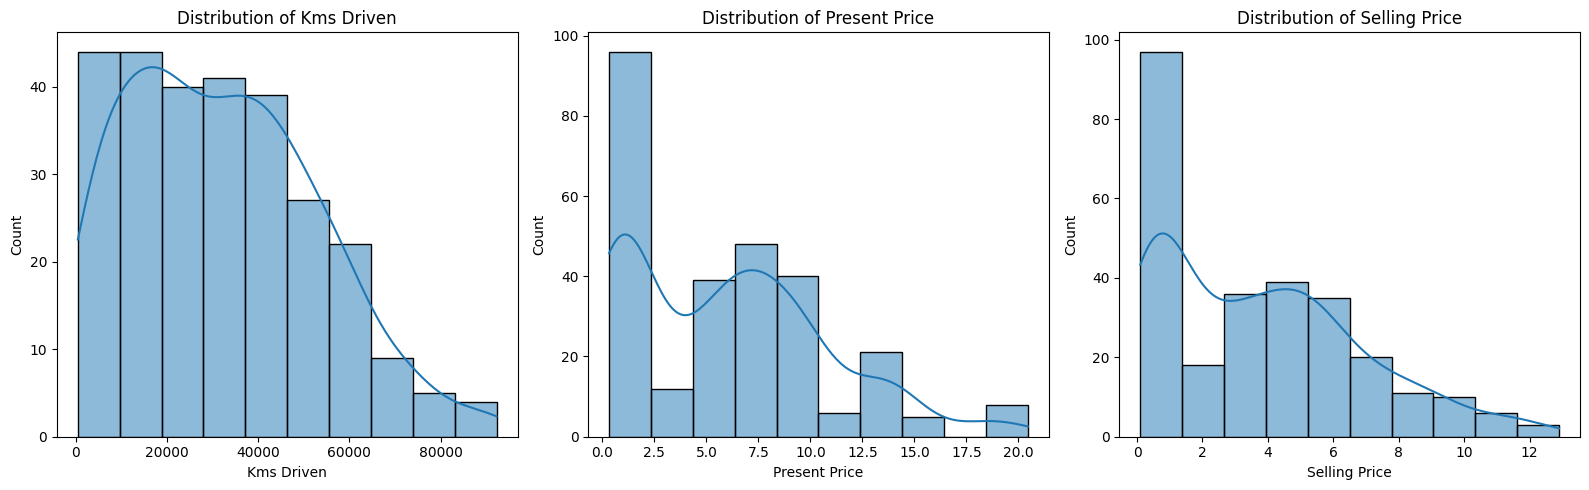

In [39]:
print("----"*30)
print("Histograms After Outliers Treatment using Trimming Method")
print("----"*30)
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(new_data_df_trim["Kms_Driven"], kde=True)
plt.title("Distribution of Kms Driven")
plt.xlabel("Kms Driven")

plt.subplot(1, 3, 2)
sns.histplot(new_data_df_trim["Present_Price"], kde=True)
plt.title("Distribution of Present Price")
plt.xlabel("Present Price")

plt.subplot(1, 3, 3)
sns.histplot(new_data_df_trim["Selling_Price"], kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.tight_layout()
plt.show()

In [40]:
new_data_df_trim.shape

(275, 9)

In [41]:
new_data_df_capped.shape

(299, 9)

In [42]:
data.shape

(299, 9)

In [43]:
new_data_df_trim.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
277,city,2015,9.70,13.6,21780,Petrol,Dealer,Manual,0
111,Royal Enfield Thunder 350,2016,1.15,1.5,8700,Petrol,Individual,Manual,0
208,i20,2017,7.90,8.1,3435,Petrol,Dealer,Manual,0
247,verna,2015,5.95,9.4,36000,Petrol,Dealer,Manual,0
271,city,2009,3.00,10.0,69562,Petrol,Dealer,Manual,0


## Feature Extraction

In [44]:
## Categorical Features
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_features

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [45]:
## Numerical Features
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
numerical_features

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [46]:
## discrete feature
discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<25]
discrete_feature

['Year', 'Owner']

In [47]:
## continuous feature
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
continuous_feature


['Selling_Price', 'Present_Price', 'Kms_Driven']

In [48]:
for col in data.columns:
  print(f"Column Name: {col}, Data Type: {data[col].dtype}")
  print(f"Unique Feature Count: {len(data[col].unique())}")
  print('-----------------------')

Column Name: Car_Name, Data Type: object
Unique Feature Count: 98
-----------------------
Column Name: Year, Data Type: int64
Unique Feature Count: 16
-----------------------
Column Name: Selling_Price, Data Type: float64
Unique Feature Count: 156
-----------------------
Column Name: Present_Price, Data Type: float64
Unique Feature Count: 147
-----------------------
Column Name: Kms_Driven, Data Type: int64
Unique Feature Count: 206
-----------------------
Column Name: Fuel_Type, Data Type: object
Unique Feature Count: 3
-----------------------
Column Name: Seller_Type, Data Type: object
Unique Feature Count: 2
-----------------------
Column Name: Transmission, Data Type: object
Unique Feature Count: 2
-----------------------
Column Name: Owner, Data Type: int64
Unique Feature Count: 3
-----------------------


## Independent Feature and Dependent Feature

In [49]:
new_data_df_capped.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


In [50]:
## Independent Feature
X = new_data_df_capped.drop(['Selling_Price'],axis=1)
X.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,6.87,42450.0,Diesel,Dealer,Manual,0


In [51]:

## dependent feature
y = new_data_df_capped['Selling_Price']
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


## Train Test Split

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape
y_train.shape,y_test.shape

((239,), (60,))

In [53]:
## Create Column Transformer with 3 types of transformer i.e. StandardScaler() , OneHotEncoder(), ColumnTransformer()
### numerical feature from independent features
num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include = "object").columns

In [54]:
num_features

Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [55]:
cat_features

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [56]:
## transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

oh_encoder = OneHotEncoder(handle_unknown='ignore', drop='first') # Add handle_unknown='ignore'
std_scaler = StandardScaler()


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_encoder,cat_features),
        ("StandardScaler",std_scaler, num_features)
    ],
     remainder='passthrough'
)

In [57]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object'))])

In [58]:
## applying the transformation to the training dataset (fit_transform)
# Fit the preprocessor ONLY on the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data using the *fitted* preprocessor (do NOT fit again!)
X_test_transformed = preprocessor.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [59]:
temp_df=pd.DataFrame(X_train_transformed)

## Model Training

### Model Evaluation

In [60]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,recall_score,precision_score

In [61]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

In [62]:
## create dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression":Ridge(),
    "Lasso Regression":Lasso(),
    "Kneighbor Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()

}

In [63]:
all_model_accuracies = {} # Dictionary to store model names and all test R2 scores

## looping for each model ,predicting the values and model evaluation
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed,y_train) ## model training

    ## Make Predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    # print(y_train_pred)
    # print(y_test_pred)

    ## model evaluation on train dataset
    model_train_mae,model_train_rmse, model_train_r2= evaluate_model(y_train,y_train_pred)

    ## model evaluation on test dataset
    model_test_mae,model_test_rmse, model_test_r2= evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))


    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    # Store both train and test R2 scores (converted to percentage)
    all_model_accuracies[list(models.keys())[i]] = {
        'test_accuracy': model_test_r2 * 100,
        'train_accuracy': model_train_r2 * 100
    }

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.7633
- Mean Absolute Error: 0.4766
- R2 Score: 0.9581
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.7489
- Mean Absolute Error: 1.8500
- R2 Score: 0.4453


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 0.8735
- Mean Absolute Error: 0.6016
- R2 Score: 0.9451
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.8552
- Mean Absolute Error: 1.1686
- R2 Score: 0.7474


Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 1.8324
- Mean Absolute Error: 1.4906
- R2 Score: 0.7584
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.5452
- Mean Absolute Error: 1.8397
- R2 Score: 0.5245


Kneighbor Regressor
Model performance for Training set
- Root Mean Squared Error: 0.8037
- Mean Absolute Error: 0.5000
- R2 Score: 0.9535
---

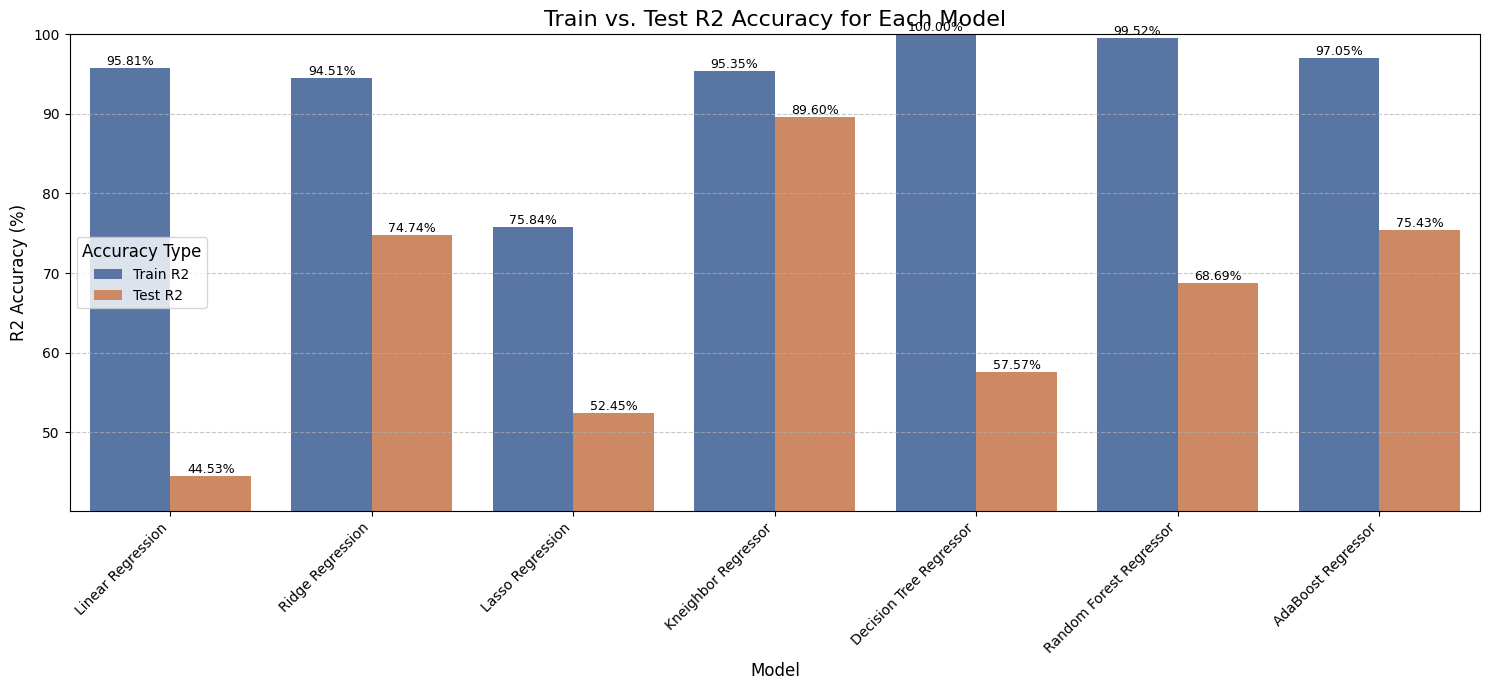

In [64]:
# Prepare data for seaborn
# We need a long-form DataFrame for seaborn's `barplot` with `hue`
plot_data = []
for model_name, accuracies in all_model_accuracies.items():
  plot_data.append({'Model': model_name, 'Accuracy Type': 'Train R2', 'R2 Accuracy (%)': accuracies['train_accuracy']})
  plot_data.append({'Model': model_name, 'Accuracy Type': 'Test R2', 'R2 Accuracy (%)': accuracies['test_accuracy']})

df_plot = pd.DataFrame(plot_data)

plt.figure(figsize=(15, 7)) # Adjust figure size as needed

sns.barplot(
    x='Model',
    y='R2 Accuracy (%)',
    hue='Accuracy Type', # This creates the grouped bars
    data=df_plot,
    palette='deep', # You can choose another palette like 'viridis', 'pastel', 'rocket'
    errorbar=None # To remove error bars if present (default is `se` for standard error)
)

# Add R2 values on top of the bars
for container in plt.gca().containers:
    for bar in container:
        height = bar.get_height()
        plt.gca().text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2f}%',
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )

plt.xlabel('Model', fontsize=12)
plt.ylabel('R2 Accuracy (%)', fontsize=12)
plt.title('Train vs. Test R2 Accuracy for Each Model', fontsize=16)

# Adjust y-axis limits to start from 0 or a sensible value if all accuracies are very high
min_overall_r2 = min(df_plot['R2 Accuracy (%)']) if not df_plot.empty else 0
plt.ylim(max(0, min_overall_r2 * 0.9), 100) # Ensure y-axis starts reasonably

plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels
plt.yticks(fontsize=10)
plt.legend(title='Accuracy Type', fontsize=10, title_fontsize=12) # Add a legend
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [65]:
## Hyper parameter tunning
### RandomizedCV
#Initialize few parameter for Hyperparamter tuning
knn_params = {
    "n_neighbors":[5,10,15,20,25,30,35],
    "weights":["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size":[10,15,20,25,30,35,40,45,50,55,60],
    "p":[1,2],
    "metric":["euclidean", "manhattan", "minkowski"],
}

ridge_params = {
    "alpha": [0.001,0.01,0.1,1.0,1.5,2.0,3.0,4.0],
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "max_iter":[None, 1000, 2000, 5000],
    "tol":[1e-4, 1e-3, 1e-2],
    "solver":['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    "positive":[False, True],
    "random_state":[None, 42]
}


dt_params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30], # 'None' means unlimited depth
    'min_samples_split': [2, 5, 10, 20],
    # 'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2', 0.8, 0.5], # 0.8 means 80% of features
    # 'max_leaf_nodes': [None, 10, 20, 30, 50],
    # 'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.05, 0.1,0.0005]
}

rf_params={
    'n_estimators': [100, 200, 300, 500], # Number of trees in the forest
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 10, 20, 30], # None means unlimited depth
    'min_samples_split': [2, 5, 10],
    'max_features': [1.0, 'sqrt', 'log2', 0.8], # For Random Forest, 'sqrt' (or 0.33) is often a good default
    # 'bootstrap': [True, False], # Whether bootstrap samples are used when building trees
    # 'oob_score': [False], # Usually set to True if you want to use OOB samples to estimate the generalization accuracy
    # 'ccp_alpha': [0.0, 0.001, 0.01], # Cost-Complexity Pruning
    # 'max_samples': [None, 0.7, 0.9], # If bootstrap=True, this sets the fraction of samples to draw. Not always tuned initially.
    # 'max_leaf_nodes': [None, 20, 50], # Less common to tune heavily if max_depth is tuned.
    # 'min_impurity_decrease': [0.0, 0.01], # Less common to tune heavily if others are used for regularization.
}

adb_params={
    'n_estimators': [50, 100, 200, 300, 500], # Number of boosting stages (weak learners)
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0], # Shrinks the contribution of each estimator
    'loss': ['linear', 'square', 'exponential'], # Type of loss function to use
    # 'estimator': [ # The base estimator. Often a DecisionTreeRegressor.
    #     # Define base estimators with various depths. Shallow trees are common for AdaBoost.
    #     DecisionTreeRegressor(max_depth=1), # Very common: "stumps"
    #     DecisionTreeRegressor(max_depth=2),
    #     DecisionTreeRegressor(max_depth=3),
    #     # You could also try other simple models here, but Decision Trees are standard.
    # ],
}

In [66]:
# Models list for Hyperparameter tuning
randomcv_models=[
    ("Ridge Regression",Ridge(),ridge_params),
     ("KNN Regression",KNeighborsRegressor(),knn_params),
    ("Decision Tree",DecisionTreeRegressor(),dt_params),
    ("Random Forest",RandomForestRegressor(),rf_params),
    ("Ada Boost",AdaBoostRegressor(),adb_params)
]

In [67]:
### Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        n_jobs=-1,
        verbose = 1,
    )
    random.fit(X_train_transformed,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"-------------------Best Paramters for {model_name}-----------------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
192 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py", line 1249, in fit
    return super().fit(X, y

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_base.py:598: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 75 is smaller than n_iter=100. Running 75 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 75 candidates, totalling 225 fits
-------------------Best Paramters for Ridge Regression-----------------------------
{'tol': 0.01, 'solver': 'sparse_cg', 'random_state': None, 'positive': False, 'max_iter': None, 'fit_intercept': True, 'copy_X': True, 'alpha': 1.5}
-------------------Best Paramters for KNN Regression-----------------------------
{'weights': 'distance', 'p': 2, 'n_neighbors': 5, 'metric': 'minkowski', 'leaf_size': 25, 'algorithm': 'kd_tree'}
-------------------Best Paramters for Decision Tree-----------------------------
{'splitter': 'best', 'min_samples_split': 2, 'max_features': None, 'max_depth': 10, 'criterion': 'squared_error', 'ccp_alpha': 0.001}
-------------------Best Paramters for Random Forest-----------------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 1.0, 'max_depth': 30, 'criterion': 'squared_error'}
-------------------Best Paramters for Ada Boost-----------------------------
{'n_estimators': 300, 

In [70]:
## create dictionary of models
models = {
    "Ridge Regressor":Ridge(alpha = 1.5,
                            fit_intercept = True,
                            max_iter = None,
                            positive = False,
                            random_state = None,
                            solver = 'sparse_cg',
                            tol=0.01),

    "KNN Regressor":KNeighborsRegressor(n_neighbors = 5,
                            weights = 'distance',
                            algorithm = 'kd_tree',
                            leaf_size = 25,
                            p = 2,
                            metric = 'minkowski'),

    "Decision Tree Regressor":DecisionTreeRegressor(splitter = 'best',
                                                    min_samples_split = 2,
                                                    max_features = None,
                                                    max_depth = 10,
                                                    criterion = 'squared_error',
                                                    ccp_alpha = 0.001),
    "Random Forest Regressor":RandomForestRegressor(
                                                    n_estimators = 200,
                                                    min_samples_split = 2,
                                                    max_features = None,
                                                    max_depth = 30,
                                                    criterion = 'squared_error',
                                                   ),
    "AdaBoost Regressor": AdaBoostRegressor(
        n_estimators = 300, loss  = 'exponential', learning_rate = 0.05
    )
}

all_model_tuned_accuracies = {} # Dictionary to store model names and all test R2 scores


## looping for each model ,predicting the values and model evaluation
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed,y_train) ## model training

    ## Make Predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    # print(y_train_pred)
    # print(y_test_pred)

    ## model evaluation on train dataset
    model_train_mae,model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)

    ## model evaluation on test dataset
    model_test_mae,model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))


    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    # Store both train and test R2 scores (converted to percentage)
    all_model_tuned_accuracies[list(models.keys())[i]] = {
        'tuned_test_accuracy': model_test_r2 * 100,
        'tuned_train_accuracy': model_train_r2 * 100
    }

    print('='*35)
    print('\n')

Ridge Regressor
Model performance for Training set
- Root Mean Squared Error: 0.9225
- Mean Absolute Error: 0.6458
- R2 Score: 0.9388
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.8535
- Mean Absolute Error: 1.1852
- R2 Score: 0.7478


KNN Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1458
- Mean Absolute Error: 0.7353
- R2 Score: 0.9036


Decision Tree Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1496
- Mean Absolute Error: 0.1073
- R2 Score: 0.9984
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.3894
- Mean Absolute Error: 1.0690
- R2 Score: 0.5809




/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_base.py:598: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2626
- Mean Absolute Error: 0.1572
- R2 Score: 0.9950
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0333
- Mean Absolute Error: 0.9281
- R2 Score: 0.6965


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.6756
- Mean Absolute Error: 0.5154
- R2 Score: 0.9672
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.7858
- Mean Absolute Error: 1.0039
- R2 Score: 0.7659




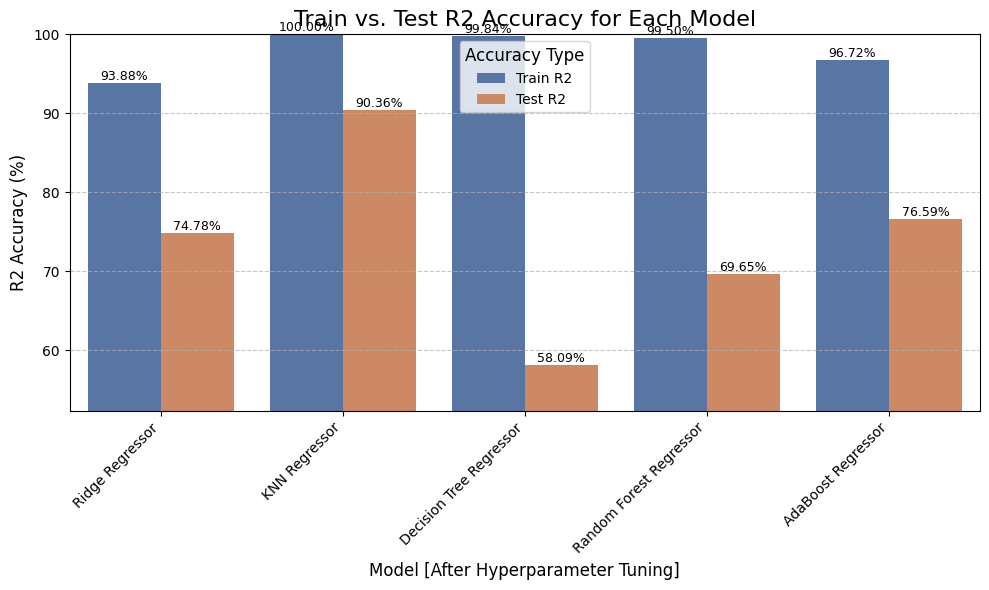

In [71]:
# Prepare data for seaborn
# We need a long-form DataFrame for seaborn's `barplot` with `hue`
plot_data = []
for model_name, accuracies in all_model_tuned_accuracies.items():
  plot_data.append({'Model': model_name, 'Accuracy Type': 'Train R2', 'R2 Accuracy (%)': accuracies['tuned_train_accuracy']})
  plot_data.append({'Model': model_name, 'Accuracy Type': 'Test R2', 'R2 Accuracy (%)': accuracies['tuned_test_accuracy']})

df_plot = pd.DataFrame(plot_data)

plt.figure(figsize=(10, 6)) # Adjust figure size as needed

sns.barplot(
    x='Model',
    y='R2 Accuracy (%)',
    hue='Accuracy Type', # This creates the grouped bars
    data=df_plot,
    palette='deep', # You can choose another palette like 'viridis', 'pastel', 'rocket'
    errorbar=None # To remove error bars if present (default is `se` for standard error)
)

# Add R2 values on top of the bars
for container in plt.gca().containers:
    for bar in container:
        height = bar.get_height()
        plt.gca().text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2f}%',
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )

plt.xlabel('Model [After Hyperparameter Tuning]', fontsize=12)
plt.ylabel('R2 Accuracy (%)', fontsize=12)
plt.title('Train vs. Test R2 Accuracy for Each Model', fontsize=16)

# Adjust y-axis limits to start from 0 or a sensible value if all accuracies are very high
min_overall_r2 = min(df_plot['R2 Accuracy (%)']) if not df_plot.empty else 0
plt.ylim(max(0, min_overall_r2 * 0.9), 100) # Ensure y-axis starts reasonably

plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels
plt.yticks(fontsize=10)
plt.legend(title='Accuracy Type', fontsize=10, title_fontsize=12) # Add a legend
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
